**Data Overview Tasks**
- <span style="color:yellow"><b><i>Data Loading</i></b></span>
- <span style="color:yellow"><b><i>Data cleaning</i></b></span>
- <span style="color:yellow"><b><i> Top 10 Handsets</i></b></span>
- <span style="color:yellow"><b><i>  Top 3 Manufacturers </i></b></span>
- <span style="color:yellow"><b><i>  Top 5 Handsets for Each Manufacturer </i></b></span>
- <span style="color:yellow"><b><i>  Aggregates user behavior data per user based on the provided DataFrame </i></b></span>
- <span style="color:yellow"><b><i> EDA </i></b></span>
- <span style="color:yellow"><b><i> Univariate Analysis Graph </i></b></span>
- <span style="color:yellow"><b><i> Bi-variate Analysis Graph </i></b></span>
- <span style="color:yellow"><b><i> Correlation </i></b></span>
- <span style="color:yellow"><b><i> Principal Component Analysis </i></b></span>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns
from dotenv import load_dotenv
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
import os, sys
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\Users\ibsan\Desktop\TenX\week-2\notebooks
c:\Users\ibsan\Desktop\TenX\week-2


In [3]:
# importing modules from the scripts folder
from scripts.DataPipline import DataPipeline 
from scripts.StatAnalyzer import EDA_AND_STAT_ANALYZER


- <span style="color:yellow"><b><i>Data Loading</i></b></span>

In [4]:
query = "SELECT * FROM xdr_data;"
telecom_df = DataPipeline.load_data_using_sqlalchemy(query=query)
telecom_df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0



- <span style="color:yellow"><b><i> Data Cleaning </i></b></span>

In [5]:
Telecom_Cleaned_Data = DataPipeline.Data_Cleaning(telecom_df)
Telecom_Cleaned_Data.head(3)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,106.199942,17.628232,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


- <span style="color:yellow"><b><i> Top 10 Handsets</i></b></span>

In [6]:
top_10_handsets = Telecom_Cleaned_Data['Handset Type'].value_counts()
top_10_handsets.nlargest(10)

Handset Type
Huawei B528S-23A                19724
Apple iPhone 6S (A1688)          9391
Apple iPhone 6 (A1586)           8991
undefined                        8892
Apple iPhone 7 (A1778)           6274
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4555
Samsung Galaxy S8 (Sm-G950F)     4459
Apple iPhone X (A1901)           3805
Name: count, dtype: int64

- <span style="color:yellow"><b><i>  Top 3 Manufacturers </i></b></span>

In [7]:
top_3_manufacturers = Telecom_Cleaned_Data['Handset Manufacturer'].value_counts()
top_3_manufacturers.nlargest(3)

Handset Manufacturer
Apple      59304
Samsung    40393
Huawei     34269
Name: count, dtype: int64

- <span style="color:yellow"><b><i>  Top 5 Handsets for Each Manufacturer </i></b></span>

In [8]:
# Group by Manufacturer and count the occurrences of each Handset
grouped_data = Telecom_Cleaned_Data.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

# Get the top 3 manufacturers based on total handset count
top_manufacturers = grouped_data.groupby('Handset Manufacturer')['Count'].sum().nlargest(3).index.tolist()

# Filter data for the top 3 manufacturers
filtered_data = grouped_data[grouped_data['Handset Manufacturer'].isin(top_manufacturers)]

# Get the top 5 handsets for each manufacturer
top_handsets = filtered_data.groupby('Handset Manufacturer').head(5)

# Print the results
print(top_handsets)


    Handset Manufacturer                  Handset Type  Count
25                 Apple            Apple iPad (A1823)      9
26                 Apple            Apple iPad (A1954)      9
27                 Apple          Apple iPad 2 (A1396)      4
28                 Apple          Apple iPad 3 (A1430)      2
29                 Apple          Apple iPad 4 (A1460)      8
301               Huawei               Huawei Ale-Ul00      2
302               Huawei              Huawei Ascend G6      2
303               Huawei           Huawei Ascend G620S      3
304               Huawei           Huawei Ascend Mate7      5
305               Huawei              Huawei Ascend P7      1
829              Samsung        Samsung 2018 Galaxy J4      7
830              Samsung  Samsung Galaxy A3 (Sm-A300X)     93
831              Samsung  Samsung Galaxy A3 (Sm-A310X)    198
832              Samsung   Samsung Galaxy A3 (Sm-A320)   1623
833              Samsung  Samsung Galaxy A5 (Sm-A500X)     43


- <span style="color:yellow"><b><i>  Aggregates user behavior data per user based on the provided DataFrame </i></b></span>

In [9]:
# load environmemt variable from .dotenv
load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")


connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

In [10]:
results = DataPipeline.excute_telecom_queries(connection_string)

for key, value in results.items():
    print(f"{key}:\n")

    # check if the result is a dataframe
    if isinstance(value, pd.DataFrame):
        print(value.to_string(index=False))
    else:
        print(value)
    print("\n" + "="*40 + "\n")

unique_imsi_count:

 unique_imsi_count
            107265


average_duration:

 average_duration
    104608.560347


total_data_usage:

        IMSI  total_ul_bytes  total_dl_bytes
         NaN    2.350613e+10    2.580162e+11
2.082017e+14    6.894830e+08    8.156743e+09
2.082021e+14    7.034786e+08    7.811295e+09
2.082010e+14    7.295774e+08    7.770043e+09
2.082010e+14    5.815688e+08    7.309542e+09
2.082014e+14    6.696507e+08    7.301517e+09
2.082019e+14    6.242603e+08    7.081602e+09
2.082014e+14    4.050610e+08    6.903440e+09
2.082003e+14    5.215189e+08    6.610852e+09
2.082017e+14    4.712445e+08    6.400774e+09


avg_rtt_by_location:

   Last Location Name  avg_rtt_dl  avg_rtt_ul
              T10450C 6314.714286    4.571429
9.16456699821824E+015 6128.888889    6.444444
              D19121A 5553.166667    2.083333
              L88381B 1851.727273    9.909091
              T11119B  777.714286    5.500000
              D16786A  673.466667   22.866667
              D74535C  

In [11]:
Aggregated_Result = DataPipeline.aggregate_user_behavior(Telecom_Cleaned_Data)
Aggregated_Result.head(20)

,User,Number_of_Sessions,Total_Session_Duration,Total_Download,Total_Upload
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0
5,3.360101e+10,2,253983.0,5.552080e+08,60009249.0
6,3.360101e+10,2,128360.0,5.530412e+08,101681858.0
7,3.360101e+10,1,86399.0,2.940851e+08,38575279.0
8,3.360101e+10,2,495702.0,8.965602e+08,93572016.0
9,3.360102e+10,1,124854.0,6.853728e+08,47091008.0


- <span style="color:yellow"><b><i> EDA </i></b></span>

In [12]:
Telecom_EDA = EDA_AND_STAT_ANALYZER.EDA(Telecom_Cleaned_Data)
Telecom_EDA


Total Data per Decile:
Decile
0    7.360629e+12
1    7.355246e+12
2    7.402462e+12
3    1.567801e+13
4    6.307598e+12
5    7.357668e+12
6    7.328779e+12
7    7.377948e+12
8    7.384538e+12
Name: Total_Data, dtype: float64

Dispersion Parameters:
             Bearer Id    Start ms      End ms     Dur. (ms)          IMSI  \
mean      1.014659e+19  499.218934  498.624344  1.051294e+05  2.082016e+14   
std       2.893245e+18  288.559368  288.076442  8.101836e+04  1.525163e+10   
min       6.917538e+18    0.000000    0.000000  7.142000e+03  2.040471e+14   
max       1.318654e+19  999.000000  999.000000  1.859336e+06  2.082522e+14   
median    7.349883e+18  499.000000  500.000000  8.639900e+04  2.082015e+14   
skew      2.142439e-02    0.000499   -0.000738  3.969863e+00 -2.692082e+02   
kurtosis -1.995415e+00   -1.197148   -1.199112  3.727932e+01  7.303760e+04   

          MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean       4.191542e+10  4.849938e+13       106.00

- <span style="color:yellow"><b><i> Univariate Analysis Graph </i></b></span>

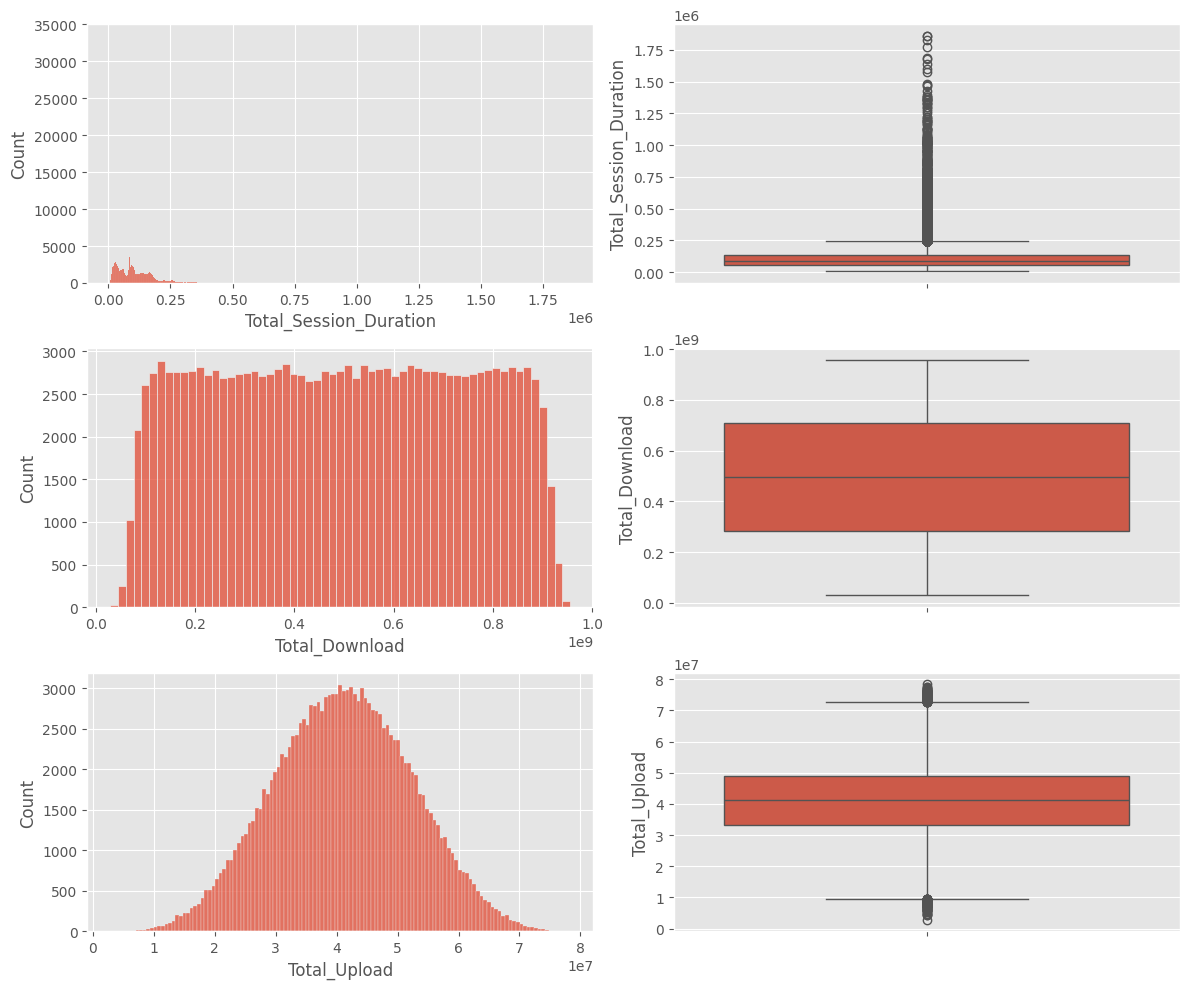

In [13]:
Univariate_Graph = EDA_AND_STAT_ANALYZER.Univariate_graph(Telecom_Cleaned_Data)
Univariate_Graph

- <span style="color:yellow"><b><i> Bi-variate Analysis Graph </i></b></span>

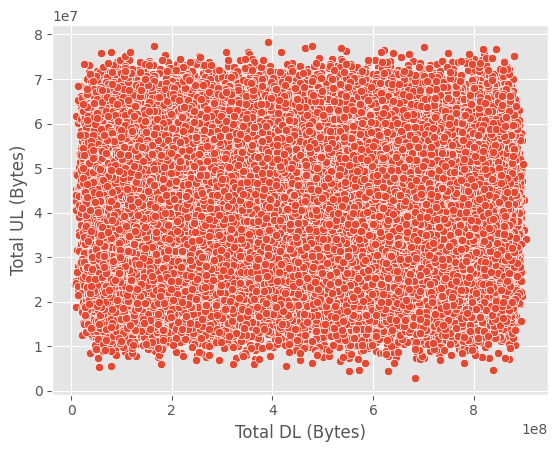

In [14]:
Bi_variate_graph = EDA_AND_STAT_ANALYZER.Bivariate_graph(Telecom_Cleaned_Data)
Bi_variate_graph

- <span style="color:yellow"><b><i> Correlation </i></b></span>

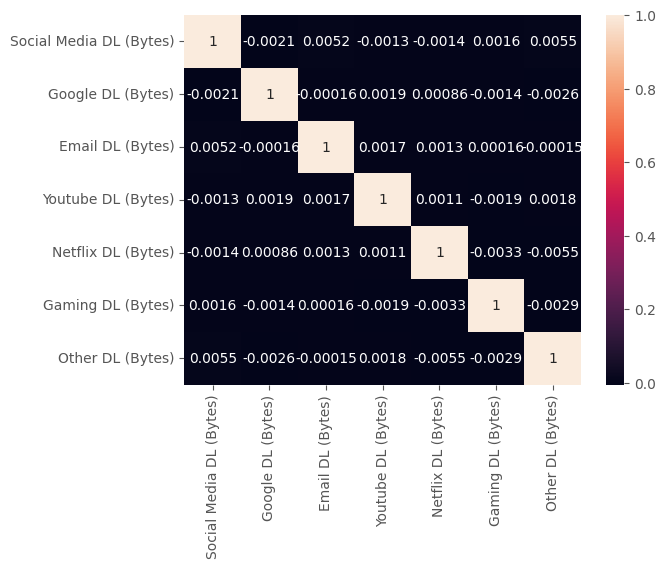

In [15]:
Correlation_Analysis = EDA_AND_STAT_ANALYZER.Correlation(Telecom_Cleaned_Data)
Correlation_Analysis

- <span style="color:yellow"><b><i> Principal Component Analysis </i></b></span>


PCA Results:
Explained Variance Ratio: [0.50181856 0.49731119]


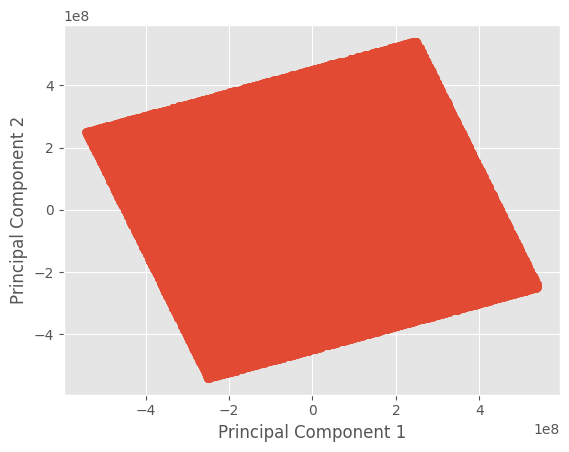

In [16]:
Pca_analysis = EDA_AND_STAT_ANALYZER.Pca_Analysis(Telecom_Cleaned_Data)
Pca_analysis